# Crop Prediction EDA

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
# Set agg.path.chunksize to a higher value
mpl.rcParams['agg.path.chunksize'] = 10000

sns.set()

## Data exploration

In [35]:

data = pd.read_csv("datasets/Crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


<Axes: title={'center': 'Average Crop Yield by Type'}, xlabel='label'>

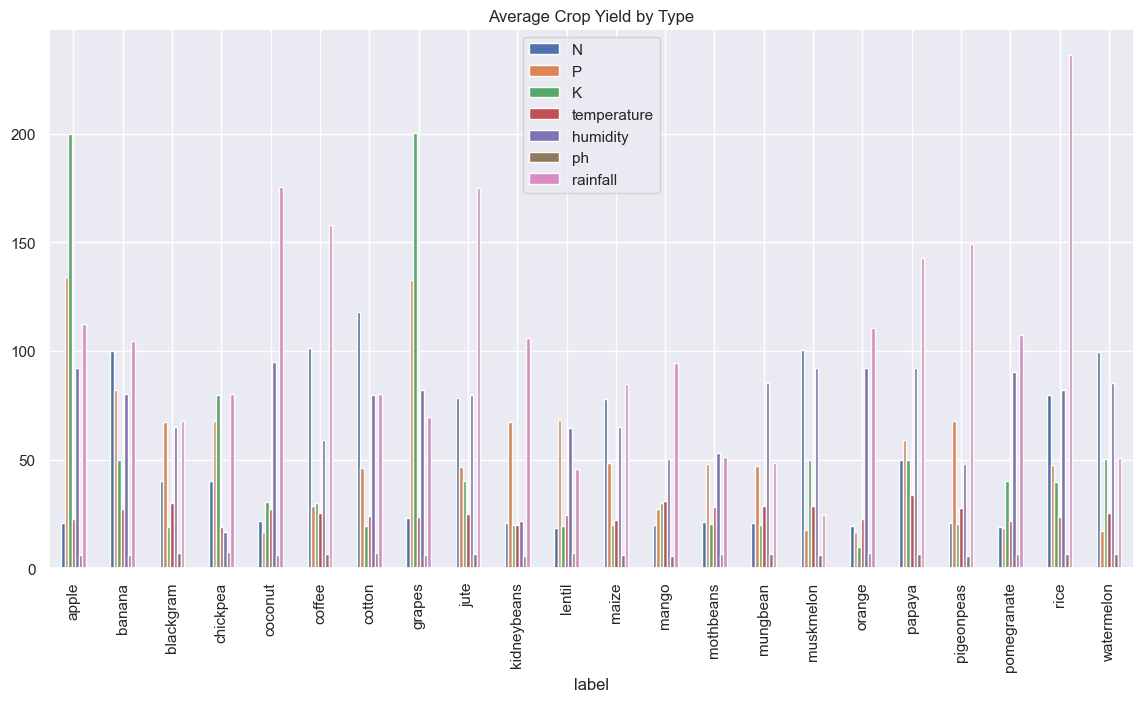

In [36]:

data.groupby("label").mean().plot(kind="bar", title="Average Crop Yield by Type", figsize=(14,7))


In [37]:
data.info()
data["crop"] = data["label"].astype("category").cat.codes

crop_df = data.drop(columns=["label"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


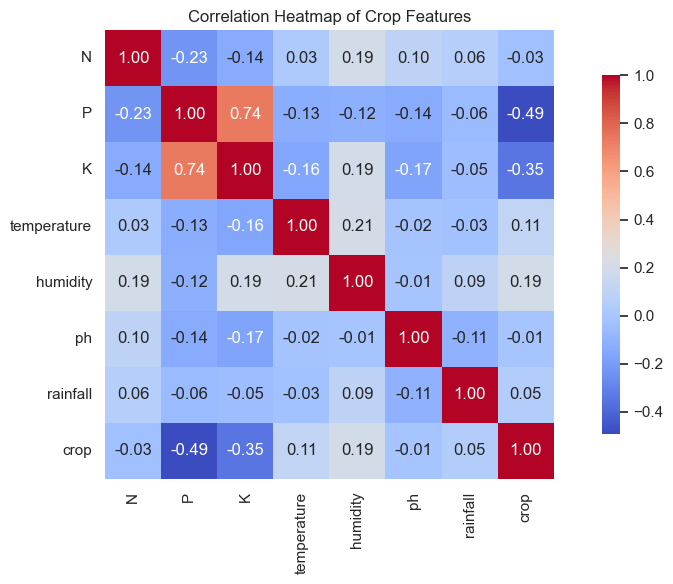

In [38]:
corr = crop_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Crop Features")
plt.tight_layout()
plt.show()


/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_41602/3877639174.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


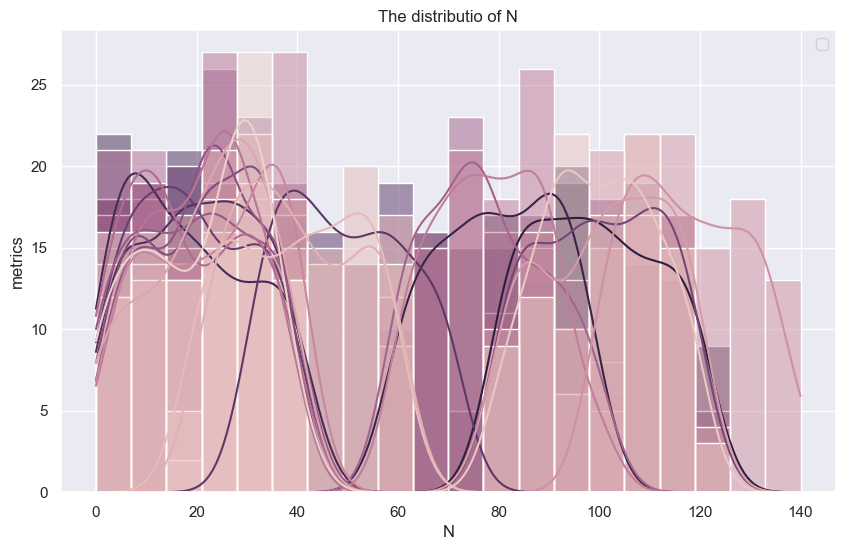

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_41602/3877639174.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


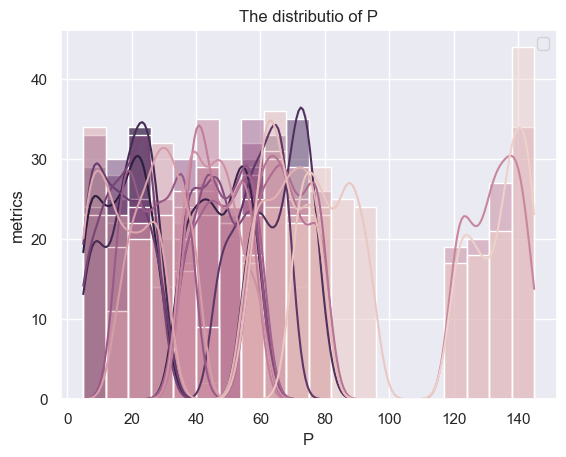

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_41602/3877639174.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


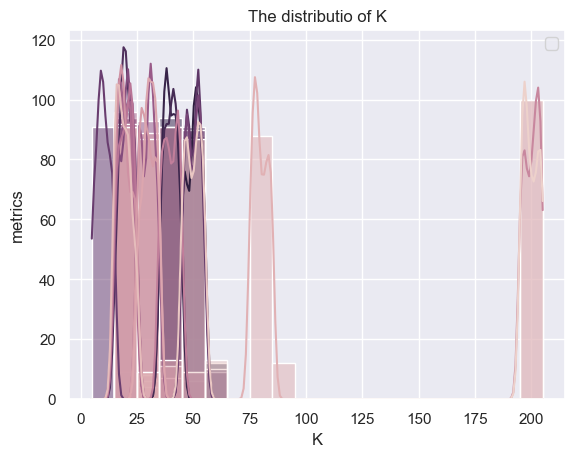

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_41602/3877639174.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


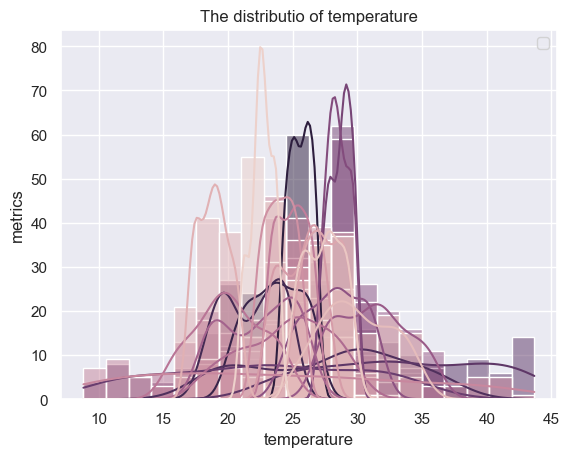

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_41602/3877639174.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


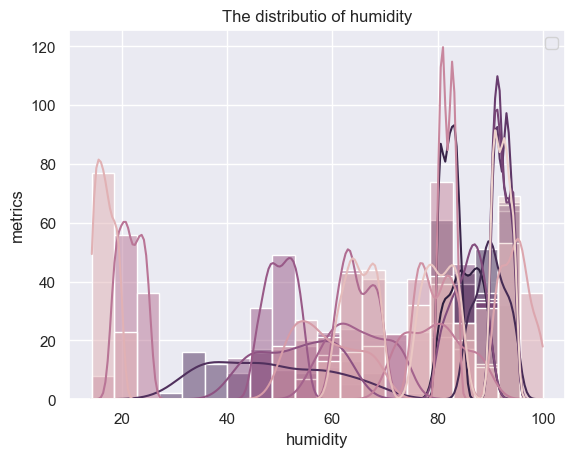

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_41602/3877639174.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


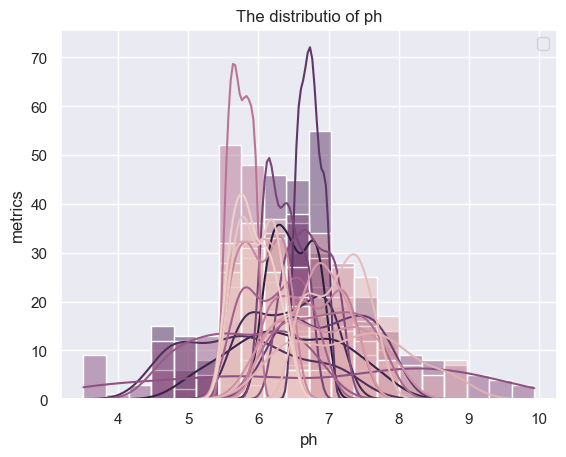

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_41602/3877639174.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


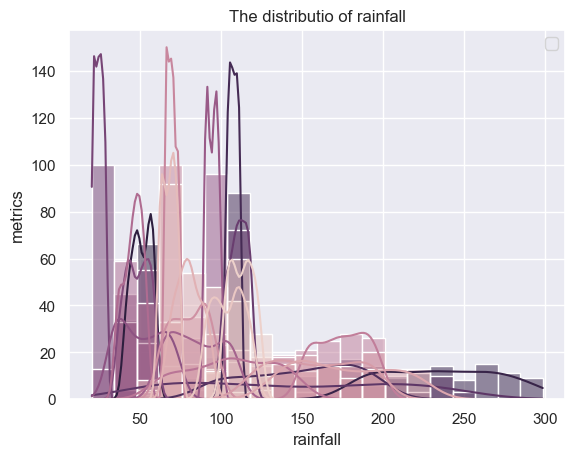

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_41602/3877639174.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


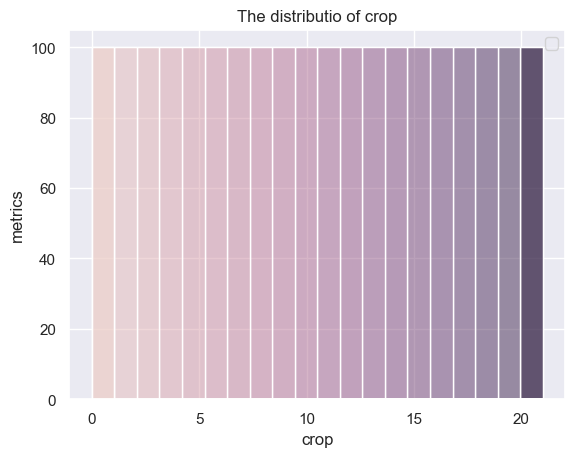

In [40]:

plt.figure(figsize=(10, 6))
for col in crop_df.columns:
    sns.histplot(x=col,data=crop_df,bins=20,kde=True, hue="crop")
    plt.ylabel('metrics')
    plt.title(f'The distributio of {col}')
    plt.legend()
    plt.show()

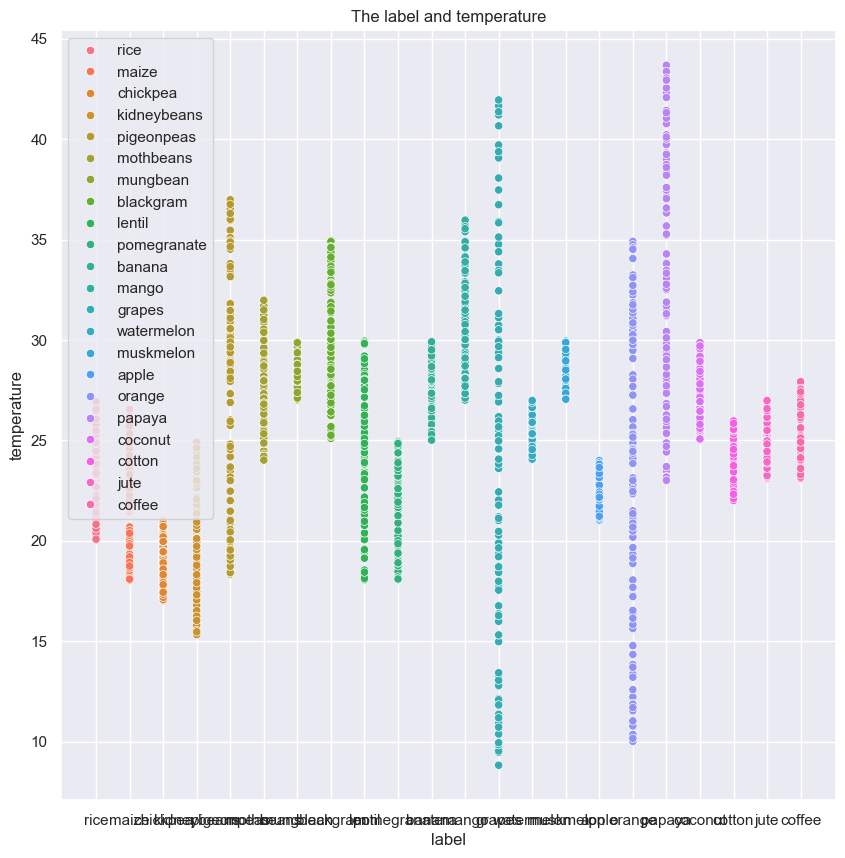

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='label',y='temperature',data=data,hue='label')
plt.title('The label and temperature')
plt.legend()
plt.show()